In [88]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd


In [89]:
# Save config information.
api_key = "87aa725f5240354c25f06b9e0767e82e"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
cities_pd = pd.read_csv("cities.csv")
cities_pd.head()
city_list = cities_pd["City"]
city_list.head()


0        New York
1     Los Angeles
2         Chicago
3         Houston
4    Philadelphia
Name: City, dtype: object

In [90]:


# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# List for holding the latitude and temperature
lat_data = []
temp_data = []
counter = 0

for city in city_list:
    print("----------------------")
    print("Now logging city # " + str(counter))
    print(query_url + city)
    response = req.get(query_url + city).json()
    
    print(response.get("coord").get("lat"))
    print(response.get("main").get("temp"))
    lat_data.append(response.get("coord").get("lat"))
    temp_data.append(response.get("main").get("temp"))
    counter = counter + 1

weather_data = {"temp": temp_data, "lat": lat_data}
weather_data = pd.DataFrame(weather_data)
weather_data

----------------------
Now logging city # 0
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=New York
40.71
67.15
----------------------
Now logging city # 1
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Los Angeles
34.05
64.26
----------------------
Now logging city # 2
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Chicago
41.85
65.19
----------------------
Now logging city # 3
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Houston
29.76
70.57
----------------------
Now logging city # 4
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Philadelphia
39.95
63.81
----------------------
Now logging city # 5
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Phoenix


35.37
57.24
----------------------
Now logging city # 52
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Tampa
27.95
76.41
----------------------
Now logging city # 53
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Aurora
39.73
50.47
----------------------
Now logging city # 54
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Honolulu
21.31
78.17
----------------------
Now logging city # 55
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Anaheim
33.84
64.06
----------------------
Now logging city # 56
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Santa Ana
33.75
64.04
----------------------
Now logging city # 57
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=

,lat,temp
0,40.71,67.15
1,34.05,64.26
2,41.85,65.19
3,29.76,70.57
4,39.95,63.81
5,33.45,75.92
6,29.42,74.21
7,32.72,64.58
8,32.78,75.20
9,37.34,57.18


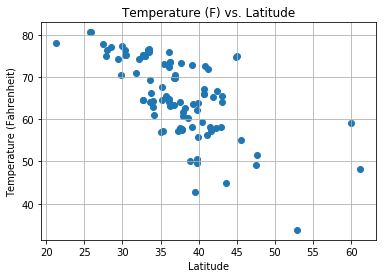

In [109]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

In [92]:
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# List for holding the latitude and temperature
lat_data = []
hum_data = []
counter = 0

for city in city_list:
    print("----------------------")
    print("Now logging city # " + str(counter))
    print(query_url + city)
    response = req.get(query_url + city).json()
    
    print(response.get("coord").get("lat"))
    print(response.get("main").get("humidity"))
    lat_data.append(response.get("coord").get("lat"))
    hum_data.append(response.get("main").get("humidity"))
    counter = counter + 1

humidity_data = {"humidity": hum_data, "lat": lat_data}
humidity_data = pd.DataFrame(humidity_data)
humidity_data

----------------------
Now logging city # 0
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=New York
40.71
94
----------------------
Now logging city # 1
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Los Angeles
34.05
82
----------------------
Now logging city # 2
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Chicago
41.85
77
----------------------
Now logging city # 3
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Houston
29.76
83
----------------------
Now logging city # 4
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Philadelphia
39.95
100
----------------------
Now logging city # 5
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Phoenix
33.45
22
-----

32.74
78
----------------------
Now logging city # 50
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Cleveland
41.5
100
----------------------
Now logging city # 51
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Bakersfield
35.37
63
----------------------
Now logging city # 52
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Tampa
27.95
88
----------------------
Now logging city # 53
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Aurora
39.73
87
----------------------
Now logging city # 54
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Honolulu
21.31
65
----------------------
Now logging city # 55
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Anaheim
33.84


,humidity,lat
0,94,40.71
1,82,34.05
2,77,41.85
3,83,29.76
4,100,39.95
5,22,33.45
6,94,29.42
7,77,32.72
8,78,32.78
9,77,37.34


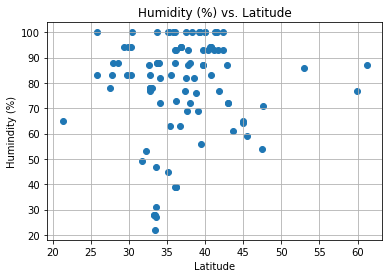

In [108]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], humidity_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humindity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityvsLatitude.png")

# Show plot
plt.show()

In [94]:
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# List for holding the latitude and temperature
lat_data = []
cloud_data = []
counter = 0

for city in city_list:
    print("----------------------")
    print("Now logging city # " + str(counter))
    print(query_url + city)
    response = req.get(query_url + city).json()
    
    print(response.get("coord").get("lat"))
    print(response.get("clouds").get("all"))
    lat_data.append(response.get("coord").get("lat"))
    cloud_data.append(response.get("clouds").get("all"))
    counter = counter + 1

cloudiness_data = {"cloudiness": cloud_data, "lat": lat_data}
cloudiness_data = pd.DataFrame(cloudiness_data)
cloudiness_data.head()

----------------------
Now logging city # 0
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=New York
40.71
40
----------------------
Now logging city # 1
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Los Angeles
34.05
1
----------------------
Now logging city # 2
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Chicago
41.85
1
----------------------
Now logging city # 3
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Houston
29.76
40
----------------------
Now logging city # 4
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Philadelphia
39.95
1
----------------------
Now logging city # 5
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Phoenix
33.45
1
----------

32.74
1
----------------------
Now logging city # 50
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Cleveland
41.5
1
----------------------
Now logging city # 51
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Bakersfield
35.37
1
----------------------
Now logging city # 52
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Tampa
27.95
1
----------------------
Now logging city # 53
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Aurora
39.73
75
----------------------
Now logging city # 54
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Honolulu
21.31
75
----------------------
Now logging city # 55
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Anaheim
33.84
40
--

34.11
90


,cloudiness,lat
0,40,40.71
1,1,34.05
2,1,41.85
3,40,29.76
4,1,39.95


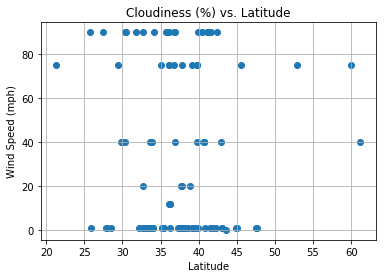

In [107]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], cloudiness_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessvsLatitude.png")

# Show plot
plt.show()

In [96]:
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# List for holding the latitude and temperature
lat_data = []
wind_data = []
counter = 0

for city in city_list:
    print("----------------------")
    print("Now logging city # " + str(counter))
    print(query_url + city)
    response = req.get(query_url + city).json()
    
    print(response.get("coord").get("lat"))
    print(response.get("wind").get("speed"))
    lat_data.append(response.get("coord").get("lat"))
    wind_data.append(response.get("wind").get("speed"))
    counter = counter + 1

wind_speed_data = {"wind speed": wind_data, "lat": lat_data}
wind_speed_data = pd.DataFrame(wind_speed_data)
wind_speed_data.head()

----------------------
Now logging city # 0
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=New York
40.71
5.82
----------------------
Now logging city # 1
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Los Angeles
34.05
2.39
----------------------
Now logging city # 2
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Chicago
41.85
5.82
----------------------
Now logging city # 3
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Houston
29.76
2.62
----------------------
Now logging city # 4
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Philadelphia
39.95
2.62
----------------------
Now logging city # 5
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Phoenix
33.45

32.74
6.93
----------------------
Now logging city # 50
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Cleveland
41.5
2.73
----------------------
Now logging city # 51
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Bakersfield
35.37
5.82
----------------------
Now logging city # 52
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Tampa
27.95
4.07
----------------------
Now logging city # 53
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Aurora
39.73
3.36
----------------------
Now logging city # 54
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Honolulu
21.31
6.93
----------------------
Now logging city # 55
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=Ana

43.61
5.82
----------------------
Now logging city # 99
http://api.openweathermap.org/data/2.5/weather?appid=87aa725f5240354c25f06b9e0767e82e&units=Imperial&q=San Bernardino
34.11
3.36


,lat,wind speed
0,40.71,5.82
1,34.05,2.39
2,41.85,5.82
3,29.76,2.62
4,39.95,2.62


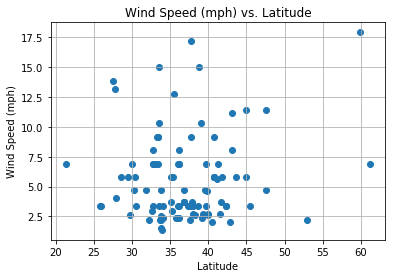

In [106]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], wind_speed_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindspeedvsLatitude.png")

# Show plot
plt.show()